In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
from algo import *
from util import *
from environment import *
from ids import *

In [2]:
def set_experiment5(price_list=np.linspace(0.01,1,100), segments=1000, update_freq=10, T=1000):
    start = time.time()
    exp_MAB_1 = pricing_MAB(price_list=price_list, segments=segments,update_freq=update_freq, exp='exp5', T=T)
    exp_MAB_1.segments_means(param1=3,param2=6)
    df, df2 = exp_MAB_1.true_optimal()
    print('time:',time.time()-start)
    return exp_MAB_1, df, df2

The highest true optimal is 11
The lowest true optimal is: 1
time: 28.29899501800537


<AxesSubplot:>

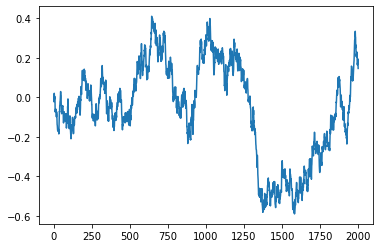

In [3]:
#changeable parameters
np.random.seed(5566)
price_list=np.linspace(0.01,1,20)
T = 2000

#fix parameters
segments = 1000
update_freq = 10
trial_rounds = 2
exp_MAB_1, df, df2 = set_experiment5(price_list=price_list, segments=segments, update_freq =10, T=T)
sns.lineplot(data=exp_MAB_1.brownian_sequence)

In [4]:
#IDS_1
IDS_1_df = pd.DataFrame()
IDS_1_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDS_1 = IDS_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, eg_p=0.01,  window_width=100)
    IDS_1_sum, IDS_1_pt, IDS_1_re, IDS_1_arm, IDS_1_post = IDS_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDS_1 time:',end-start)
    IDS_1_df = IDS_1_df.append([np.cumsum(IDS_1_re)])
    IDS_1_df_arm = IDS_1_df_arm.append([IDS_1_arm])

Reward change detected at time: 162
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 253
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 274
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 313
Detected Sign: 1
Detector cooling
Detector cooling
Reward change detected at time: 353
Detected Sign: -1
Reward change detected at time: 426
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 523
Detected Sign: 1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 880
Detected S

In [5]:
#IDST_1
IDST_1_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    IDST_1 = IDS_theta_pull(price_list=price_list, N=update_freq+1, start_L=2, update_L=0,
                     simulate_time_initiate=1, simulate_time_update=1, eg_p=0.01, window_width=100)
    IDST_1_sum, IDST_1_pt, IDST_1_re, IDST_1_arm, IDST_1_post = IDST_1.IDS(T=T, pricing_MAB=exp_MAB_1, mode='mode1',
                                                                     update_style='none', base=1000, p=np.nan,
                                                                     p_y=np.nan, R=np.nan)
    end = time.time()
    print('trial',i, 'IDST_1 time:',end-start)
    IDST_1_df = IDST_1_df.append([np.cumsum(IDST_1_re)])

Reward change detected at time: 180
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 201
Detected Sign: -1
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Detector cooling
Reward change detected at time: 253
Detected Sign: -1
Detector cooling
eg triggered at  307
arm
1.0     0.625512
3.0     1.000000
4.0     0.104292
5.0     0.364171
6.0     1.000000
7.0     0.002544
11.0    0.386861
14.0    1.000000
17.0    1.000000
Name: pvalue, dtype: float64
demand shape does not match
Reward change detected at time: 391
Detect

In [6]:
# UCB1
UCB_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCB1 = UCBPI_pull(price_list=price_list, segments=segments, c=1, bias=0, UCB1=True)
    UCB1_sum, UCB1_pt, UCB1_re, UCB1_arm = UCB1.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCB time:',end-start)
    UCB_df = UCB_df.append([np.cumsum(UCB1_re)])
    
# UCBPI family
UCBPI_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    UCBPI = UCBPI_pull(price_list=price_list, segments=segments, c=4, bias=0, UCB1=False)
    UCBPI_sum, UCBPI_pt, UCBPI_re, UCBPI_arm = UCBPI.UCBPI(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'UCBPI time:',end-start)
    UCBPI_df = UCBPI_df.append([np.cumsum(UCBPI_re)])
    
# TS
TS_df = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    TS = TS_pull(price_list=price_list, est='MEAN')
    TS_sum, TS_pt, TS_re, TS_arm = TS.TS(T=T, pricing_MAB=exp_MAB_1)
    end = time.time()
    print('trial',i, 'TS time:',end-start)
    TS_df = TS_df.append([np.cumsum(TS_re)])

# EG
EG_df = pd.DataFrame()
EG_df_arm = pd.DataFrame()
for i in range(trial_rounds):
    start = time.time()
    EG = EG_pull(price_list=price_list)
    EG_sum, EG_pt, EG_re, EG_arm = EG.EG(T=T, pricing_MAB=exp_MAB_1, e=0.1)
    end = time.time()
    print('trial',i, 'EG time:',end-start)
    EG_df = EG_df.append([np.cumsum(EG_re)])

trial 0 UCB time: 1.3404560089111328
trial 1 UCB time: 1.1441528797149658
trial 0 UCBPI time: 1.536034107208252
trial 1 UCBPI time: 1.2619729042053223
trial 0 TS time: 1.7402129173278809
trial 1 TS time: 1.6323001384735107
trial 0 EG time: 0.14114880561828613
trial 1 EG time: 0.14809322357177734


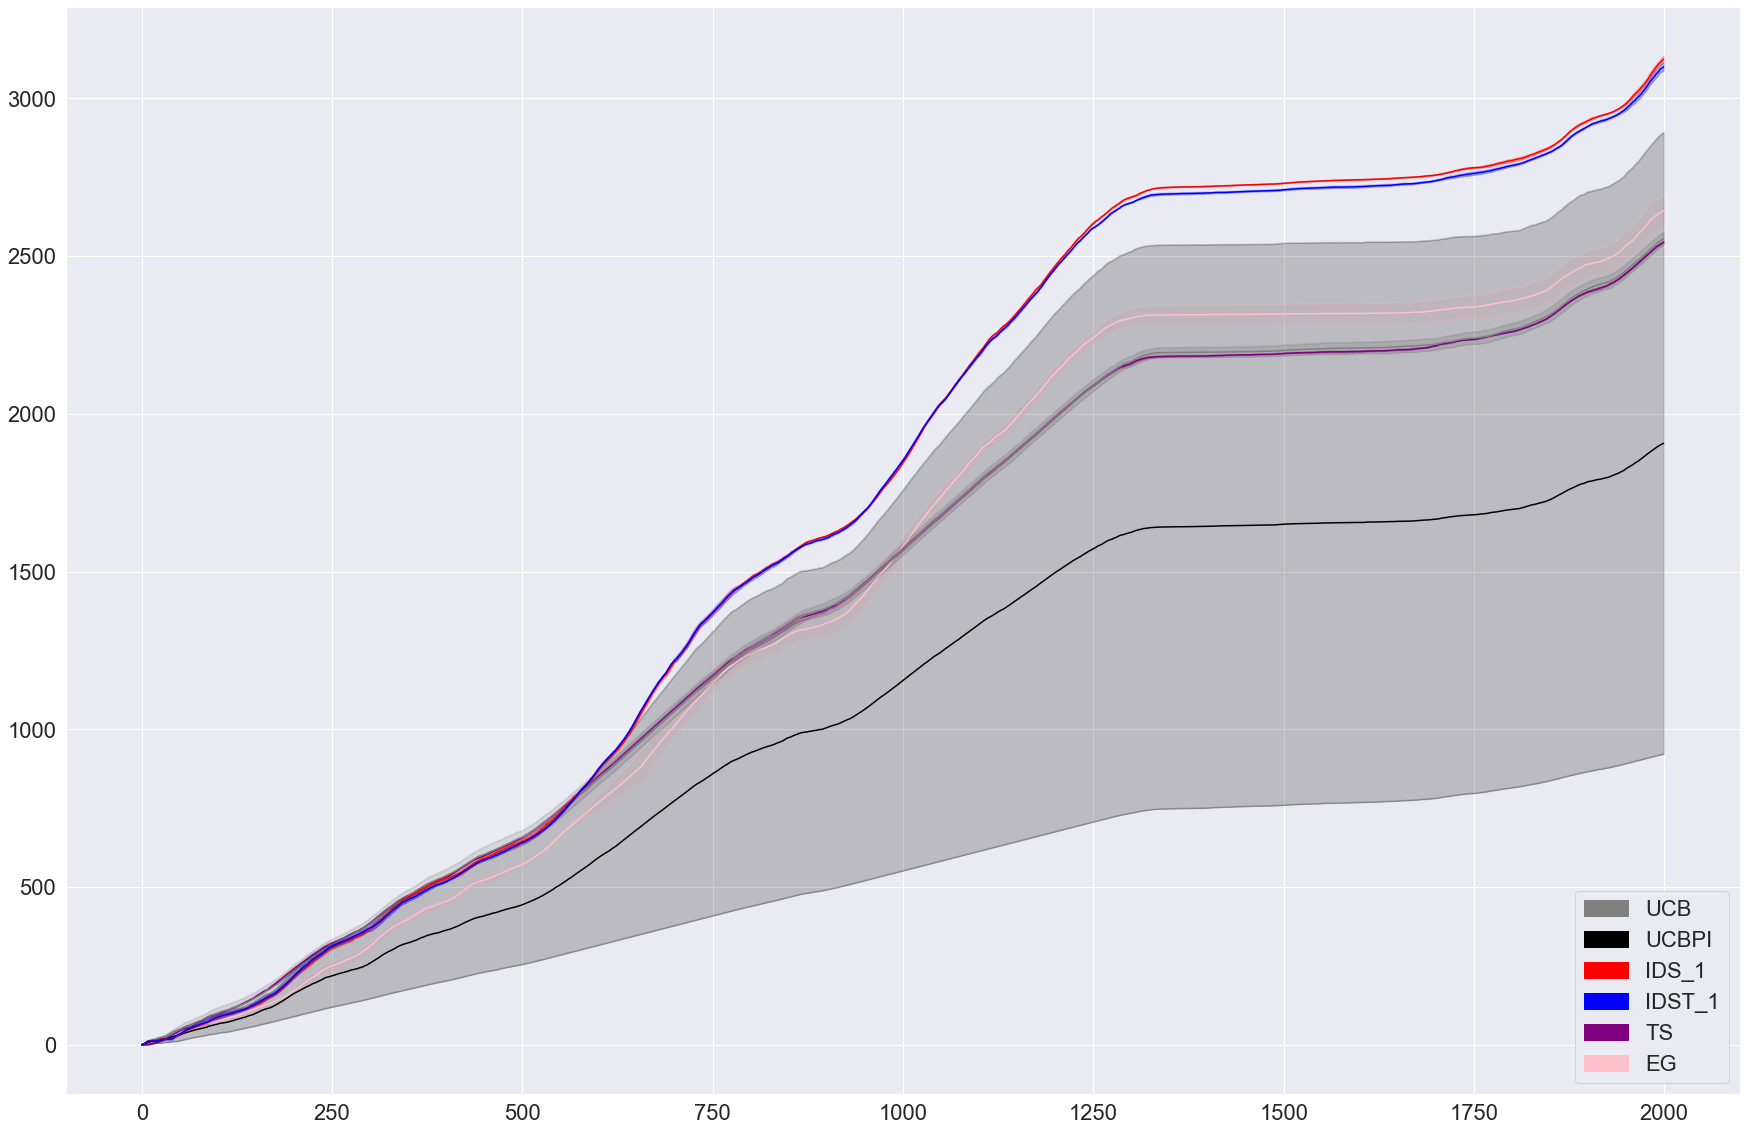

In [7]:
import matplotlib.patches as mpatches
def draw_exp_graph(IDS_1,IDST_1,UCB,UCBPI,TS, EG,sd=2):
    IDS_1_mean = IDS_1.mean()
    IDST_1_mean = IDST_1.mean()
    UCB_mean = UCB.mean()
    UCBPI_mean = UCBPI.mean()
    TS_mean = TS.mean()
    EG_mean = EG.mean()
    
    T = np.arange(IDS_1.shape[1])
    
    plt.figure(figsize=(30,20))
    sns.set(font_scale=2)
    
    for i in range(EG.shape[0]):
        plt.plot(EG.iloc[i],alpha=0.2,color='pink')
    plt.plot(EG_mean,alpha=1,color='pink')
    plt.fill_between(T, EG.min(), EG.max(), color='pink', alpha=0.2)
    
    for i in range(TS.shape[0]):
        plt.plot(TS.iloc[i],alpha=0.2,color='purple')
    plt.plot(TS_mean,alpha=1,color='purple')
    plt.fill_between(T, TS.min(), TS.max(), color='purple', alpha=0.2)
    
    for i in range(UCB.shape[0]):
        plt.plot(UCB.iloc[i],alpha=0.2,color='gray')
    plt.plot(UCB_mean,alpha=1,color='gray')
    plt.fill_between(T, UCB.min(), UCB.max(), color='gray', alpha=0.2)
    
    for i in range(UCBPI.shape[0]):
        plt.plot(UCBPI.iloc[i],alpha=0.2,color='black')
    plt.plot(UCBPI_mean,alpha=1,color='black')
    plt.fill_between(T, UCBPI.min(), UCBPI.max(), color='black', alpha=0.2)

    for i in range(IDS_1.shape[0]):
        plt.plot(IDS_1.iloc[i],alpha=0.2,color='red')
    plt.plot(IDS_1_mean,alpha=1,color='red')
    plt.fill_between(T, IDS_1.min(), IDS_1.max(), color='red', alpha=0.2)
    
    for i in range(IDST_1.shape[0]):
        plt.plot(IDST_1.iloc[i],alpha=0.2,color='blue')
    plt.plot(IDST_1_mean,alpha=1,color='blue')
    plt.fill_between(T, IDST_1.min(), IDST_1.max(), color='blue', alpha=0.2)
    
    leg_UCB = mpatches.Patch(color='gray', label='UCB')
    leg_UCBPI = mpatches.Patch(color='black', label='UCBPI')
    leg_IDS_1 = mpatches.Patch(color='red', label='IDS_1')
    leg_IDST_1 = mpatches.Patch(color='blue', label='IDST_1')
    leg_TS = mpatches.Patch(color='purple', label='TS')
    leg_EG = mpatches.Patch(color='pink', label='EG')
    
    plt.legend(handles=[leg_UCB, leg_UCBPI, leg_IDS_1, leg_IDST_1, leg_TS, leg_EG], loc= 'lower right')
    plt.show()

    
draw_exp_graph(IDS_1_df,IDST_1_df,UCB_df,UCBPI_df,TS_df,EG_df,sd=1)

IDS_1


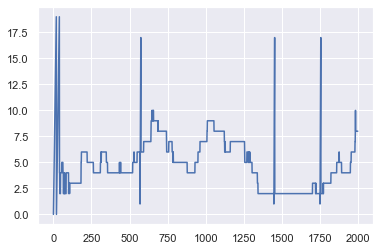

1.1965701754385967
collection rounds: 55
IDST_1


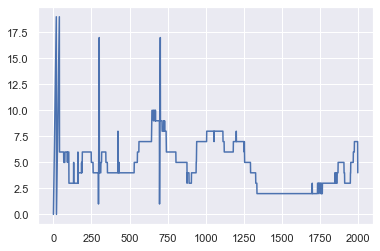

1.1700140350877193
collection rounds: 50
UCB1


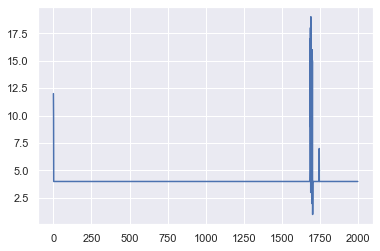

1.1195508771929825
UCBPI


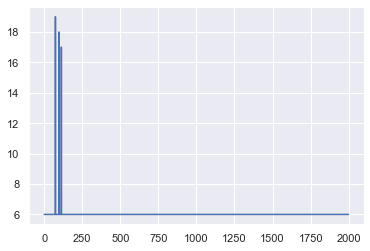

1.1345877192982456
TS


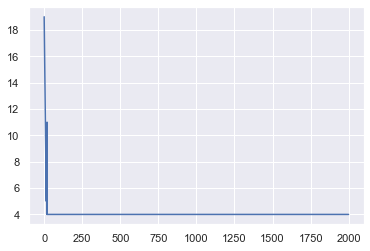

1.1345877192982456
EG


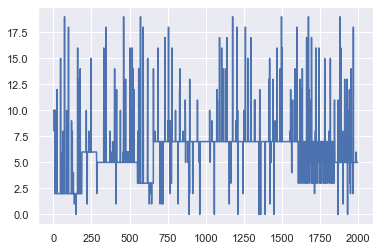

1.1345877192982456


In [8]:
sns.set(font_scale=1)
print('IDS_1')
plt.plot(IDS_1_arm)
plt.show()
print(IDS_1_re[-300:].mean())
print('collection rounds:', IDS_1.collection_rounds)

print('IDST_1')
plt.plot(IDST_1_arm)
plt.show()
print(IDST_1_re[-300:].mean())
print('collection rounds:', IDST_1.collection_rounds)

print('UCB1')
plt.plot(UCB1_arm)
plt.show()
print(UCB1_re[-300:].mean())

print('UCBPI')
plt.plot(UCBPI_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('TS')
plt.plot(TS_arm)
plt.show()
print(UCBPI_re[-300:].mean())

print('EG')
plt.plot(EG_arm)
plt.show()
print(UCBPI_re[-300:].mean())